## Repaso Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16,4]
import seaborn as sns
import sklearn
pd.options.display.max_columns = 999

In [2]:
df_pitch = pd.read_csv('./data/reviews.csv')
df_pitch.head(20)

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
5,5,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017
6,6,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017
7,7,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017
8,8,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017
9,9,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017


In [3]:
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18393 non-null  int64  
 1   reviewid        18393 non-null  int64  
 2   title           18391 non-null  object 
 3   artist          18391 non-null  object 
 4   url             18393 non-null  object 
 5   score           18393 non-null  float64
 6   best_new_music  18393 non-null  int64  
 7   author          18393 non-null  object 
 8   author_type     14487 non-null  object 
 9   pub_date        18393 non-null  object 
 10  pub_weekday     18393 non-null  int64  
 11  pub_day         18393 non-null  int64  
 12  pub_month       18393 non-null  int64  
 13  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 2.0+ MB


In [4]:
df_pitch.author.value_counts()

joe tangari                          816
stephen m. deusner                   725
ian cohen                            699
brian howe                           500
mark richardson                      476
                                    ... 
kris ex                                1
rollie pemberton & nick sylvester      1
nathan humpal                          1
caryn rose                             1
jared bane                             1
Name: author, Length: 432, dtype: int64

In [5]:
df_pitch[df_pitch['artist']!='various artists'].artist.value_counts()

guided by voices     23
david bowie          21
the beatles          21
of montreal          20
mogwai               20
                     ..
the frequency         1
lorn                  1
hagerty-toth band     1
sound team            1
f ingers              1
Name: artist, Length: 8713, dtype: int64

## Ejercicio 1.

Encontrar el número de personas que tienen cada "author type" en el dataset de Pitchfork

In [6]:
grouped = df_pitch.groupby(by='author_type',as_index=False)['author'].nunique().sort_values(by='author',ascending=False)
grouped

,author_type,author
6,contributor,225
1,associate editor,17
4,associate staff writer,4
12,senior editor,3
5,contributing editor,2
14,tracks coordinator,2
0,assistant editor,1
2,associate features editor,1
3,associate reviews editor,1
7,deputy news editor,1


### Gráficos!

Dentro de este análisis inicial es conveniente utilizar las visualizaciones que, por defecto, proporciona pandas.

El objetivo es entender mejor la distribución sin tener que "interpretar" los rangos intercuartiles que podemos obtener, por ejemplo, con describe.

Lo más normal, a la hora de entender una variable es comenzar con un boxplot o con un histograma.

El boxplot da un resumen de los datos, incluyendo unos valores que, probablemente puedan ser considerados como outliers:

<AxesSubplot:xlabel='score'>

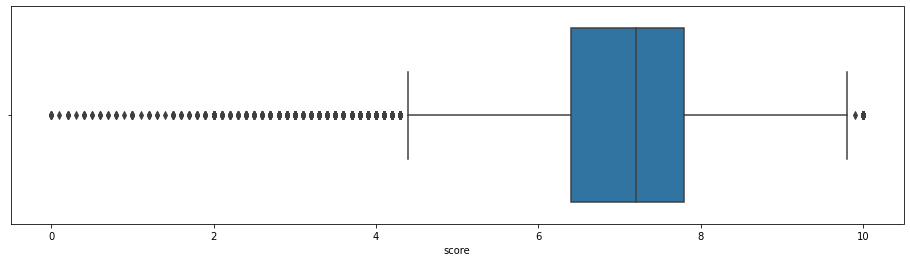

In [7]:
sns.boxplot(x = df_pitch.score)

<AxesSubplot:xlabel='score', ylabel='Count'>

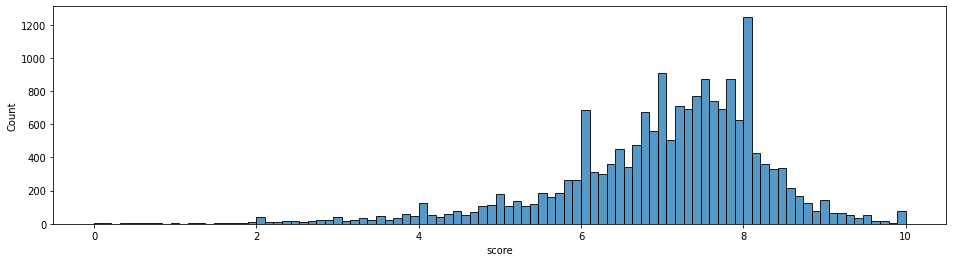

In [8]:
sns.histplot(df_pitch.score)

<AxesSubplot:xlabel='score', ylabel='Count'>

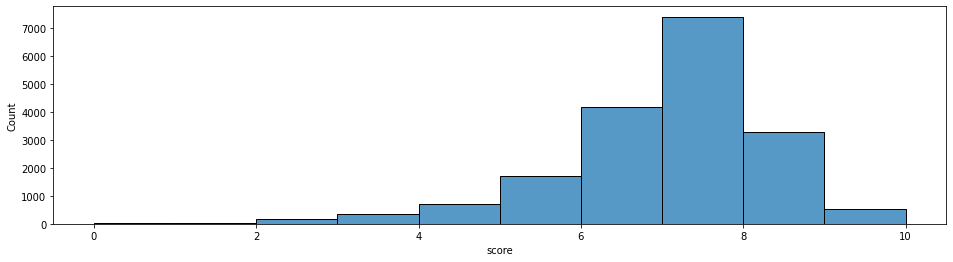

In [9]:
sns.histplot(df_pitch['score'], bins=10)

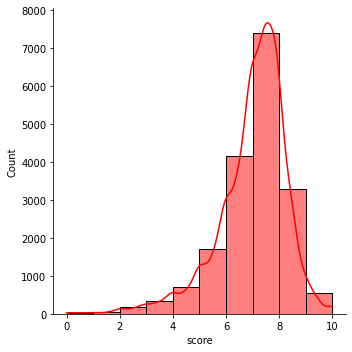

In [10]:
sns.displot(df_pitch.score,kde=True,bins=10,color='r')

<AxesSubplot:xlabel='reviewid', ylabel='score'>

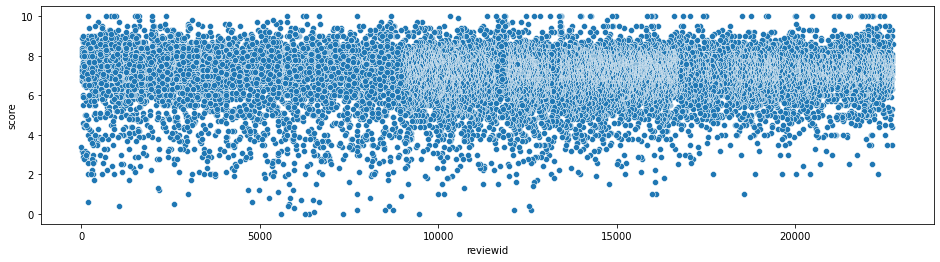

In [11]:
sns.scatterplot(data=df_pitch, x='reviewid', y='score')

<AxesSubplot:xlabel='reviewid', ylabel='score'>

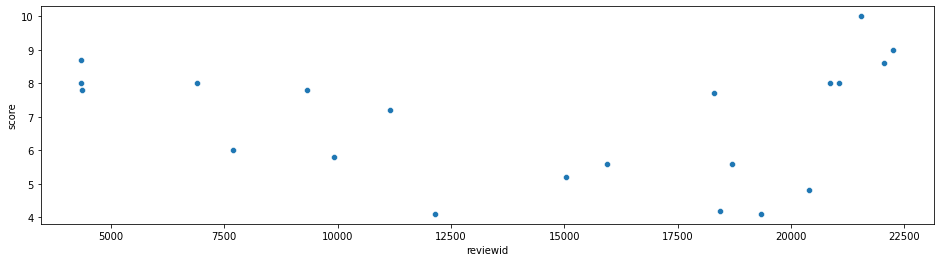

In [12]:
sns.scatterplot(data=df_pitch[df_pitch['artist'].str.contains('jackson')==True], x='reviewid', y='score')

<AxesSubplot:xlabel='score', ylabel='author_type'>

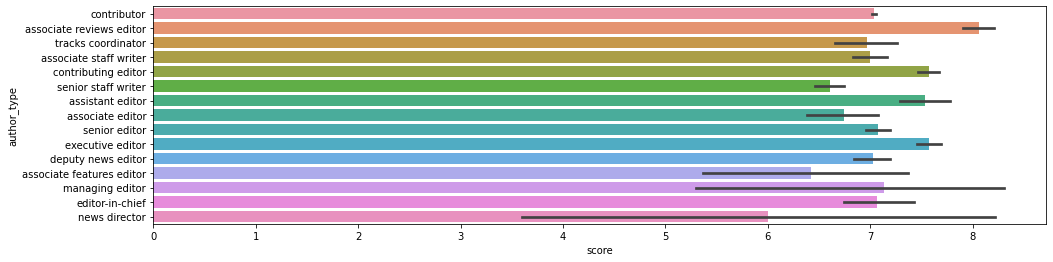

In [13]:
sns.categorical.barplot(data=df_pitch, x='score', y = 'author_type', orient='horizontal', )

<AxesSubplot:xlabel='count', ylabel='author_type'>

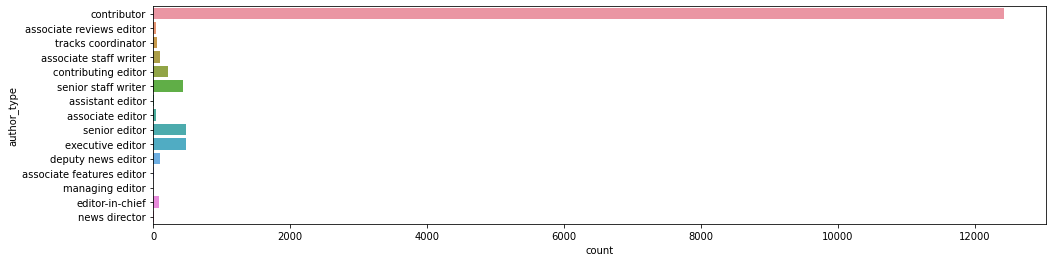

In [14]:
sns.categorical.countplot(data=df_pitch, y = 'author_type', orient='horizontal')

<AxesSubplot:xlabel='author_type', ylabel='score'>

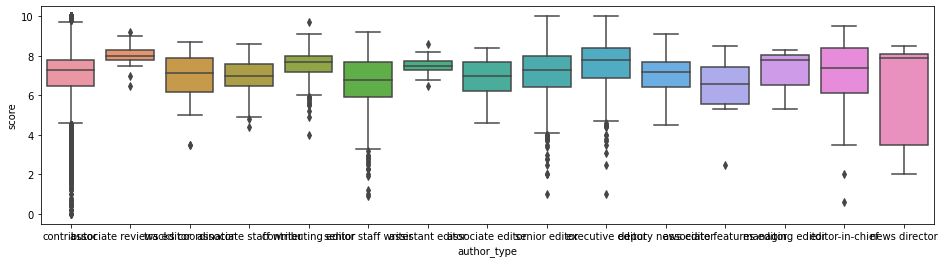

In [15]:
sns.categorical.boxplot(data=df_pitch, x='author_type', y = 'score', orient='vertical')

<AxesSubplot:xlabel='author_type', ylabel='score'>

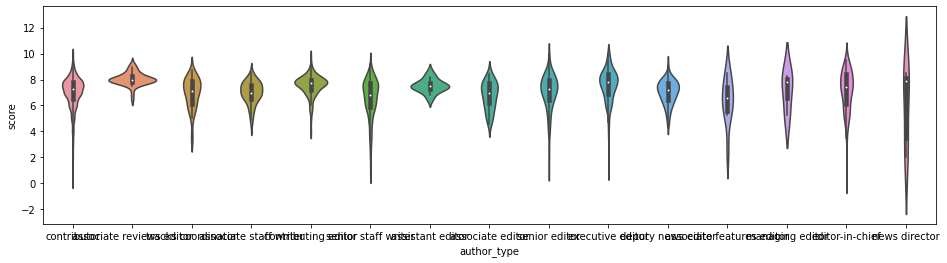

In [16]:
sns.categorical.violinplot(data=df_pitch, x='author_type', y = 'score', orient='vertical')

In [17]:
df_pitch.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df_pitch.drop(columns=['url','artist','title'],inplace=True)

In [19]:
df = pd.read_csv('./data/reviews.csv',na_values=[9.3])
df.fillna(9.3)

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,0.0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8.0,1.0,2017
1,1.0,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7.0,1.0,2017
2,2.0,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7.0,1.0,2017
3,3.0,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.3,1,jenn pelly,associate reviews editor,2017-01-06,4,6.0,1.0,2017
4,4.0,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6.0,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,18388.0,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,9.3,1999-01-26,1,26.0,1.0,1999
18389,18389.0,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,9.3,1999-01-26,1,26.0,1.0,1999
18390,18390.0,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12.0,1.0,1999
18391,18391.0,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,9.3,1999-01-12,1,12.0,1.0,1999


### Ejercicio 3

Agrupa las categorías con menos de 100 reviews en "sin determinar".

Recuerda:
 - Puedes obtener el conteo de valores de una variable con value_counts
 - value_counts devuelve un dataframe
 - el índice del dataframe es la categoría
 - el único valor del dataframe puede filtrarse

In [20]:
df_pitch['author_type'].value_counts()

contributor                  12422
senior editor                  486
executive editor               475
senior staff writer            439
contributing editor            210
associate staff writer         105
deputy news editor             100
editor-in-chief                 85
tracks coordinator              52
associate reviews editor        41
associate editor                37
assistant editor                16
associate features editor       11
news director                    5
managing editor                  3
Name: author_type, dtype: int64

In [21]:
counter = df_pitch['author_type'].value_counts()
counter = list(counter[counter<100].index)
counter

['editor-in-chief',
 'tracks coordinator',
 'associate reviews editor',
 'associate editor',
 'assistant editor',
 'associate features editor',
 'news director',
 'managing editor']

In [22]:
df_pitch['author_type'] = np.where(df_pitch['author_type'].isin(counter),'sin determinar',df_pitch['author_type'])
df_pitch['author_type'].value_counts()

contributor               12422
senior editor               486
executive editor            475
senior staff writer         439
sin determinar              250
contributing editor         210
associate staff writer      105
deputy news editor          100
Name: author_type, dtype: int64

In [23]:
df_pitch['author_type'] = df_pitch['author_type'].astype("category")
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   reviewid        18393 non-null  int64   
 1   score           18393 non-null  float64 
 2   best_new_music  18393 non-null  int64   
 3   author          18393 non-null  object  
 4   author_type     14487 non-null  category
 5   pub_date        18393 non-null  object  
 6   pub_weekday     18393 non-null  int64   
 7   pub_day         18393 non-null  int64   
 8   pub_month       18393 non-null  int64   
 9   pub_year        18393 non-null  int64   
dtypes: category(1), float64(1), int64(6), object(2)
memory usage: 1.3+ MB


## Ejercicio 4. Benford's Law

Antes de seguir con la preparación de datos, como ejercicio "recreativo" vamos a tratar una pequeña curiosidad.

La llamada Ley de Benford.

Esta "Ley" dice que, en algunos conjuntos de datos reales, existe una relación entre el número de números que comienzan por el dígito 1 y los que lo hacen por el 2, los que empiezan por 2 y los que empiezan por 3...

Utiliza el fichero "precios_venta.xlsx" que contiene muestras de 5 juegos de datos para comprobar si se cumple la Ley de Benford en cada uno de ellos.

Para comprobar si se cumple o no, debes:
1. Visualiza el contenido del Dataframe, ¿qué valores tiene?
1. ¿Los valores cambian por muestra?
1. Encontrar una forma de, dado un número, leer su primer dígito
1. Separar las muestras que hay en el fichero
2. Para cada muestra, obtener el % relativo de aparición de cada primer dígito
3. Comparar los resultados de cada análisis por separado

In [24]:
import pandas as pd
from matplotlib import pyplot

pyplot.rcParams['figure.figsize'] = (16,6)
df = pd.read_excel('./data/precios_venta.xlsx')

df.shape[0]

31268

In [25]:
print(df.PRECIO.min(),'/',df.PRECIO.max())

1.0 / 9444265.77


<AxesSubplot:xlabel='MUESTRA', ylabel='PRECIO'>

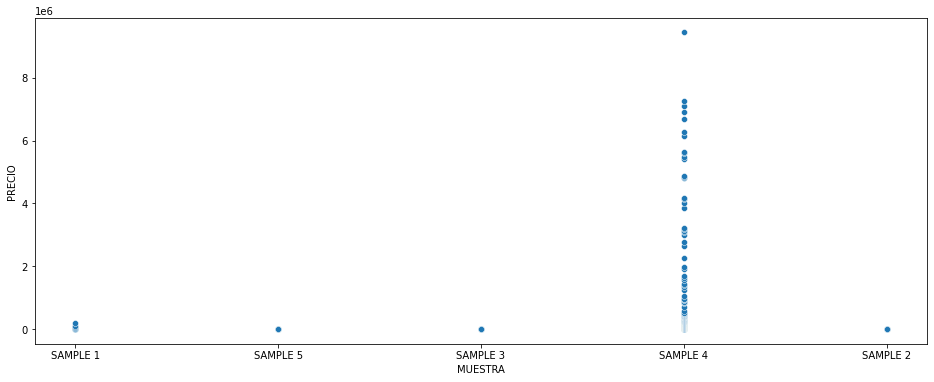

In [26]:
sns.scatterplot(data=df, x='MUESTRA', y='PRECIO')

In [27]:
import pandas as pd
df = pd.read_excel('./data/precios_venta.xlsx')
df.head()

,MUESTRA,PRECIO
0,SAMPLE 1,1.00
1,SAMPLE 1,1.01
2,SAMPLE 1,1.02
3,SAMPLE 1,1.03
4,SAMPLE 1,1.04


In [28]:
df['PRIMER DIGITO'] = df['PRECIO'].astype(str).str[0]
df['PRIMER DIGITO'] = df['PRIMER DIGITO'].astype(int)

In [29]:
pcts = round((df['PRIMER DIGITO'].value_counts() / df['PRIMER DIGITO'].value_counts().sum()) * 100,2)
pcts

1    30.73
2    15.09
3    13.72
4    13.07
5     7.15
7     6.08
9     5.23
6     4.77
8     4.14
Name: PRIMER DIGITO, dtype: float64

In [30]:
df = pd.read_excel('./data/precios_venta.xlsx')

In [31]:
def check_benford(df,muestra):
    df = df[df['MUESTRA'].str.contains(str(muestra))]
    df['PRIMER DIGITO'] = df['PRECIO'].astype(str).str[0]
    gr = round((df['PRIMER DIGITO'].value_counts() / df['PRIMER DIGITO'].value_counts().sum())*100,2)
    idx = list(gr.index)
    lst=[]
    j = 0
    for i in idx:
        i = int(i)
        k = i-j
        lst.append(k)
        j = i
    if lst==list(np.ones((9))):
        v= 'Se cumple la Ley de Benford para la muestra {}'.format(muestra).upper()
    else:
        v= 'No se cumple la Ley de Benford para la muestra {}'.format(muestra).upper()
    print(v)
    print(gr)

for i in range(1,1+len(list(df.MUESTRA.unique()))):
    check_benford(df,i)
    print('\n')

SE CUMPLE LA LEY DE BENFORD PARA LA MUESTRA 1
1    31.06
2    17.32
3    12.25
4     9.32
5     8.08
6     6.60
7     5.76
8     5.10
9     4.51
Name: PRIMER DIGITO, dtype: float64


NO SE CUMPLE LA LEY DE BENFORD PARA LA MUESTRA 2
1    31.30
4    20.87
3    14.07
7     8.21
9     7.53
5     6.52
2     5.69
8     3.42
6     2.39
Name: PRIMER DIGITO, dtype: float64


SE CUMPLE LA LEY DE BENFORD PARA LA MUESTRA 3
1    31.00
2    19.12
3    12.83
4     9.09
5     7.76
6     6.14
7     5.13
8     4.61
9     4.31
Name: PRIMER DIGITO, dtype: float64


SE CUMPLE LA LEY DE BENFORD PARA LA MUESTRA 4
1    29.39
2    20.71
3    14.70
4     9.85
5     7.06
6     5.47
7     4.84
8     4.16
9     3.83
Name: PRIMER DIGITO, dtype: float64


NO SE CUMPLE LA LEY DE BENFORD PARA LA MUESTRA 5
1    34.75
2    19.00
3    12.51
4     7.69
5     6.67
6     5.75
9     4.73
7     4.54
8     4.36
Name: PRIMER DIGITO, dtype: float64




C:\Users\aleex\AppData\Local\Temp/ipykernel_13464/2213936773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRIMER DIGITO'] = df['PRECIO'].astype(str).str[0]


In [32]:
plt.rcParams['figure.figsize'] = (16,4)

<AxesSubplot:xlabel='score'>

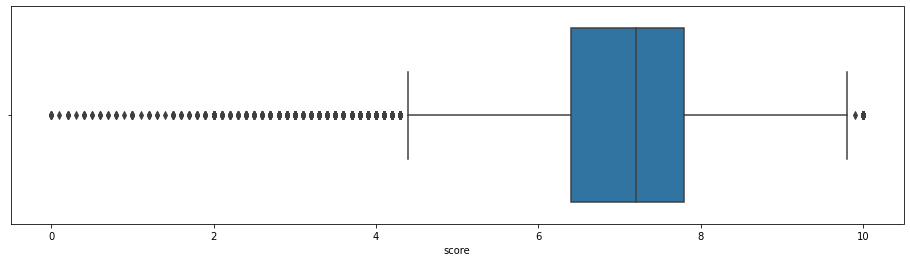

In [33]:
def leer_pitchfork():
    df = pd.read_csv('./data/reviews.csv')
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.drop_duplicates()
    return df


df_pitch = leer_pitchfork()

sns.boxplot(data=df_pitch, x='score')

<AxesSubplot:xlabel='score'>

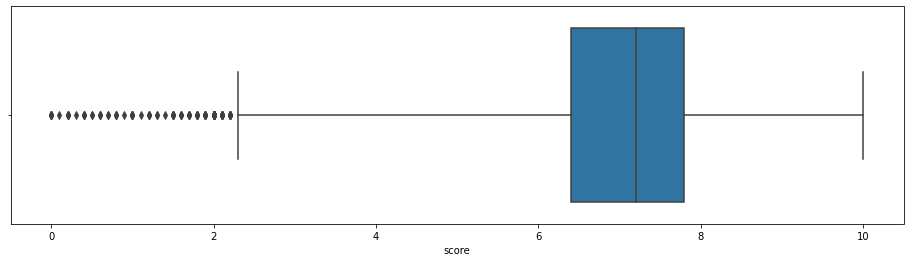

In [34]:
sns.boxplot(data=df_pitch, x='score', whis=3)

## Ejercicio 6. Localiza los outliers del score de Pitchfork utilizando el método IQR

Utiliza la función quantile de las series de datos de pandas para localizar los puntos de corte de los cuartiles

In [35]:
def outlier_iqr(df,whis=1.5,columna_evaluar='score', columna_resultado='outlier'):
    primer_q = df.score.quantile(.25)
    tercer_q = df.score.quantile(.75)
    
    iqr = tercer_q - primer_q
    print('iqr = ',round(iqr,3))
    limite_inferior = primer_q - (iqr * whis)
    limite_superior = tercer_q + (iqr * whis)
    
    limites = (round(limite_inferior,2), round(limite_superior,2))
    print(limites)
    
    df[columna_resultado] = False
    df.loc[df[columna_evaluar] < limite_inferior, columna_resultado] = True
    df.loc[df[columna_evaluar] > limite_superior, columna_resultado] = True
    print(df[columna_resultado].value_counts())
    
outlier_iqr(df_pitch)
outliers_df_pitch = df_pitch[df_pitch['outlier']==True]
outliers_df_pitch

iqr =  1.4
(4.3, 9.9)
False    17506
True       883
Name: outlier, dtype: int64


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,outlier
13,22720,december 99th,yasiin bey,http://pitchfork.com/reviews/albums/22720-dece...,3.5,0,marcus j. moore,contributor,2017-01-02,0,2,1,2017,True
161,22589,collage,the chainsmokers,http://pitchfork.com/reviews/albums/22589-coll...,3.5,0,kevin lozano,tracks coordinator,2016-11-09,2,9,11,2016,True
191,22374,metal box,public image ltd,http://pitchfork.com/reviews/albums/22374-meta...,10.0,1,simon reynolds,contributor,2016-11-01,1,1,11,2016,True
200,22485,blood on the tracks,bob dylan,http://pitchfork.com/reviews/albums/22485-bloo...,10.0,0,jesse jarnow,contributor,2016-10-30,6,30,10,2016,True
232,22515,these systems are failing,moby & the void pacific choir,http://pitchfork.com/reviews/albums/22515-thes...,4.0,0,andy beta,contributor,2016-10-21,4,21,10,2016,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18329,5965,fight songs,old 97's,http://pitchfork.com/reviews/albums/5965-fight...,4.0,0,neil lieberman,NaN,1999-04-27,1,27,4,1999,True
18330,3830,very mercenary,the herbaliser,http://pitchfork.com/reviews/albums/3830-very-...,4.2,0,ryan schreiber,editor-in-chief,1999-04-20,1,20,4,1999,True
18331,5970,uterus and fire,old time relijun,http://pitchfork.com/reviews/albums/5970-uteru...,0.3,0,michael sandlin,NaN,1999-04-20,1,20,4,1999,True
18332,2954,the sound of music: an unfinished symphony in ...,jad fair,http://pitchfork.com/reviews/albums/2954-the-s...,3.7,0,mark richard-san,NaN,1999-04-20,1,20,4,1999,True


<AxesSubplot:xlabel='score', ylabel='Count'>

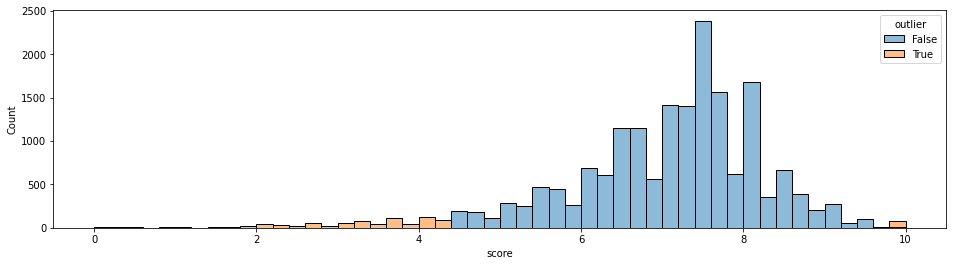

In [36]:
sns.histplot(df_pitch, x='score', hue = 'outlier',bins=50)

<AxesSubplot:xlabel='score', ylabel='Count'>

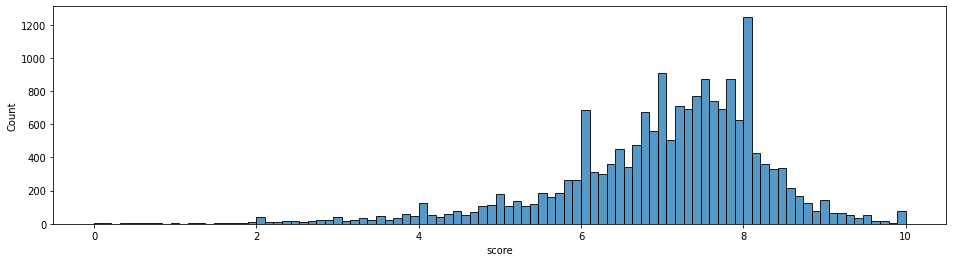

In [37]:
# Outliers en distribuciones normales

df_pitch = leer_pitchfork()
sns.histplot(df_pitch.score)

## Ejercicio 7. Detección de outliers

Utiliza 1, 2 y 3 desviaciones típicas para marcar como outliers las observaciones de puntuación de Pitchfork.

In [38]:
df_pitch.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [39]:
media = df_pitch.score.mean()
std = df_pitch.score.std()

In [40]:
num = 1
limite_inferior = media - (num * std)
limite_superior = media + (num * std)
    
limites = (round(limite_inferior,2), round(limite_superior,2))
print(limites)

(5.71, 8.3)


In [44]:
def outlier_normal(df,num=2,columna_evaluar='score', columna_resultado='outlier_normal'):
    columna_resultado = columna_resultado+'_'+str(num)
    media = df[columna_evaluar].mean()
    std = df[columna_evaluar].std()
    limite_inferior = media - (num * std)
    limite_superior = media + (num * std)
    limites = (round(limite_inferior,2), round(limite_superior,2))
    print(limites)
    df[columna_resultado] = np.where(((df[columna_evaluar] < limite_inferior)|(df[columna_evaluar] > limite_superior)),True,False)
    print(df[columna_resultado].value_counts())
    return df
    
df_pitch = leer_pitchfork()

for i in range(1,4):
    print('Numero desviaciones: ',i)
    outlier_normal(df_pitch,i)
    print('\n')

Numero desviaciones:  1
(5.71, 8.3)
False    13766
True      4623
Name: outlier_normal_1, dtype: int64


Numero desviaciones:  2
(4.42, 9.59)
False    17410
True       979
Name: outlier_normal_2, dtype: int64


Numero desviaciones:  3
(3.12, 10.89)
False    18090
True       299
Name: outlier_normal_3, dtype: int64




In [45]:
df_pitch

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,outlier_normal_1,outlier_normal_2,outlier_normal_3
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,True,False,False
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,False,False,False
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,False,False,False
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,True,False,False
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,NaN,1999-01-26,1,26,1,1999,True,False,False
18389,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,NaN,1999-01-26,1,26,1,1999,True,False,False
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999,False,False,False
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,NaN,1999-01-12,1,12,1,1999,False,False,False


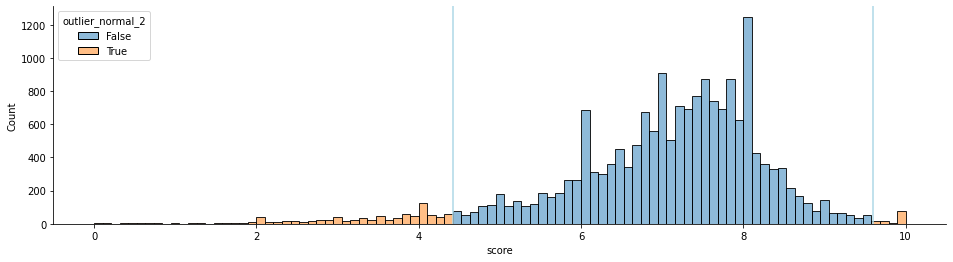

In [46]:
sns.histplot(df_pitch, x='score', hue = 'outlier_normal_2')
plt.axvline(df_pitch.score.mean() - 2*df_pitch.score.std(), 0,100,c='lightblue')
plt.axvline(df_pitch.score.mean() + 2*df_pitch.score.std(), 0,100,c='lightblue')
sns.despine()

<AxesSubplot:xlabel='score', ylabel='Count'>

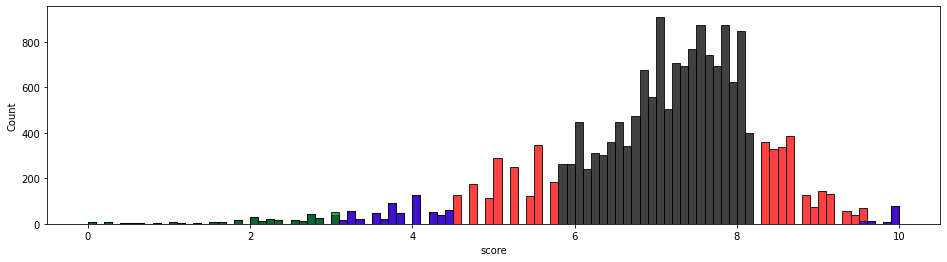

In [47]:
sns.histplot(df_pitch.loc[df_pitch['outlier_normal_1']==True].score, color='red',binwidth=0.1)
sns.histplot(df_pitch.loc[df_pitch['outlier_normal_2']==True].score, color='blue',binwidth=0.1)
sns.histplot(df_pitch.loc[df_pitch['outlier_normal_3']==True].score, color='green',binwidth=0.1)
sns.histplot(df_pitch.loc[(df_pitch['outlier_normal_3']==False)&(df_pitch['outlier_normal_2']==False)&(df_pitch['outlier_normal_1']==False)].score, color='black',binwidth=0.1)

In [48]:
def leer_csv_covid():
    columnas = ['stringency_index','population_density','median_age','aged_65_older',
          'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
          'diabetes_prevalence','female_smokers','male_smokers', 'handwashing_facilities',
          'hospital_beds_per_thousand','life_expectancy','human_development_index']
    
    # Leemos el fichero
    df = pd.read_csv('./data/owid-covid-data.csv')
    
    # Interpolamos
    df.loc[:,df.select_dtypes('number').columns.to_list()].interpolate(axis=1, inplace=True)
    
    # Última fila de cada país
    df = df.groupby(by='iso_code').nth(-1).reset_index(level=0)
    
    # Borramos columnas con pocos datos
    df.dropna(axis=1, thresh=50, inplace=True)
    
    # Borramos las columnas de fecha y país
    df.drop(columns =['location', 'date'], inplace=True)
    
    # Eliminamos las filas que no tienen información de fallecidos
    df = df.loc[pd.notna(df['total_deaths'])]

    # Imputamos la media
    medias = {c:df[c].mean() for c in columnas}
    df.fillna(medias, inplace=True)
    
    col_x = [x for x in df.select_dtypes('number').columns if x not in ('total_deaths',
                                                                             'total_deaths_smoothed_per_million',
                                                                             'new_deaths',
                                                                             'new_deaths_smoothed')]
    return df[col_x].copy()



# leemos el dataframe
df_covid = leer_csv_covid()

In [49]:
from sklearn.linear_model import LinearRegression
X = df_covid[[x for x in df_covid.columns if x != 'total_deaths_per_million']].copy() # nos quedamos con todas las columnas que no sean la variable y
y = df_covid['total_deaths_per_million']

lr = LinearRegression()
lr.fit(X,y)
print(lr.score(X,y))

0.8375336921595854


In [50]:
media = df_covid['cardiovasc_death_rate'].mean()
std = df_covid['cardiovasc_death_rate'].std()

test = df_covid[
        (df_covid['cardiovasc_death_rate'] >= media-1*std )
        &
        (df_covid['cardiovasc_death_rate'] <= media+1*std )]

In [51]:
X = test[[x for x in test.columns if x != 'total_deaths_per_million']].copy() # nos quedamos con todas las columnas que no sean la variable y
y = test['total_deaths_per_million']

lr = LinearRegression()
lr.fit(X,y)
print(lr.score(X,y))

0.8614531336152909


**Comprobar si una distribución es normal**


    Menos de una desviación típica (ref 68%): 74.85997063461852 %
    Menos de dos desviaciones (ref 95,4%): 94.67616509870031 %
    Menos de tres desviaciones (ref 99,7 %): 98.37402795149274 %

NO ES DISTRIBUCION NORMAL


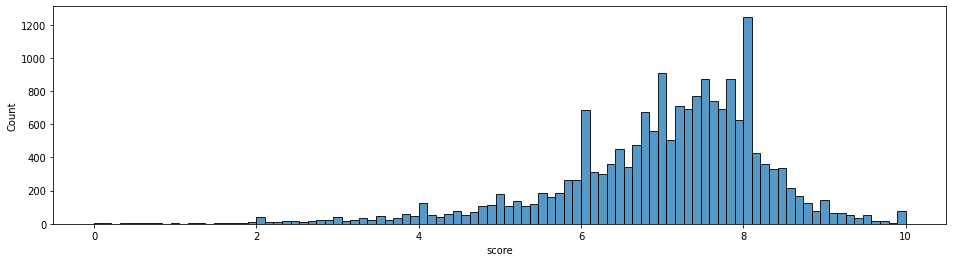

In [52]:
media = df_pitch.score.mean()
std = df_pitch.score.std()

print(f"""
    Menos de una desviación típica (ref 68%): {df_pitch.loc[abs(df_pitch.score - media) <= std].score.count() *100 / df_pitch.score.count()} %
    Menos de dos desviaciones (ref 95,4%): {df_pitch.loc[(abs(df_pitch.score - media) <= 2*std)].score.count()*100 / df_pitch.score.count()} %
    Menos de tres desviaciones (ref 99,7 %): {df_pitch.loc[(abs(df_pitch.score - media) <= 3*std)].score.count()*100 / df_pitch.score.count()} %
""")

if ((df_pitch.loc[abs(df_pitch.score - media) <= std].score.count() *100 / df_pitch.score.count())-68)<=abs(2) and ((df_pitch.loc[abs(df_pitch.score - media) <= 2*std].score.count() *100 / df_pitch.score.count())-95.4)<=abs(2) and ((df_pitch.loc[abs(df_pitch.score - media) <= 3*std].score.count() *100 / df_pitch.score.count())-99.7)<=abs(2):
    print('DISTRIBUCION NORMAL')
else:
    print('NO ES DISTRIBUCION NORMAL')

sns.histplot(df_pitch.score);

<AxesSubplot:xlabel='score_normal', ylabel='Count'>

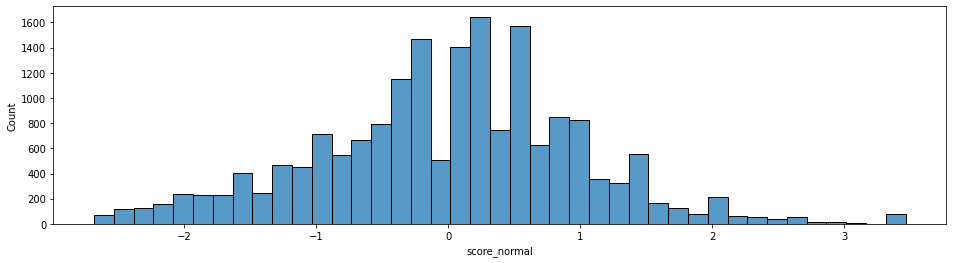

In [53]:
from sklearn.preprocessing import PowerTransformer

p = PowerTransformer(method='yeo-johnson',standardize=True)
df_pitch_normal = p.fit_transform(df_pitch[['score']])
df_pitch['score_normal']= df_pitch_normal


sns.histplot(df_pitch.score_normal, binwidth=0.15)

In [54]:
media = df_pitch.score_normal.mean()
std = df_pitch.score_normal.std()

print(f"""
    Menos de una desviación típica (ref 68%): {df_pitch.loc[abs(df_pitch.score_normal - media) <= std].score_normal.count() *100 / df_pitch.score_normal.count()} %
    Menos de dos desviaciones (ref 95,4%): {df_pitch.loc[(abs(df_pitch.score_normal - media) <= 2*std)].score_normal.count()*100 / df_pitch.score_normal.count()} %
    Menos de tres desviaciones (ref 99,7 %): {df_pitch.loc[(abs(df_pitch.score_normal - media) <= 3*std)].score_normal.count()*100 / df_pitch.score_normal.count()} %
""")

if ((df_pitch.loc[abs(df_pitch.score_normal - media) <= std].score_normal.count() *100 / df_pitch.score_normal.count())-68)<=abs(2) and ((df_pitch.loc[abs(df_pitch.score_normal - media) <= 2*std].score_normal.count() *100 / df_pitch.score_normal.count())-95.4)<=abs(2) and ((df_pitch.loc[abs(df_pitch.score_normal - media) <= 3*std].score_normal.count() *100 / df_pitch.score_normal.count())-99.7)<=abs(2):
    print('DISTRIBUCION NORMAL')
else:
    print('NO ES DISTRIBUCION NORMAL')


    Menos de una desviación típica (ref 68%): 69.65033443906684 %
    Menos de dos desviaciones (ref 95,4%): 94.68704116591441 %
    Menos de tres desviaciones (ref 99,7 %): 99.54320517700799 %

DISTRIBUCION NORMAL


In [55]:
m_t, std_t = df_pitch.score_normal.mean(), df_pitch.score_normal.std()

<AxesSubplot:xlabel='score_normal', ylabel='Count'>

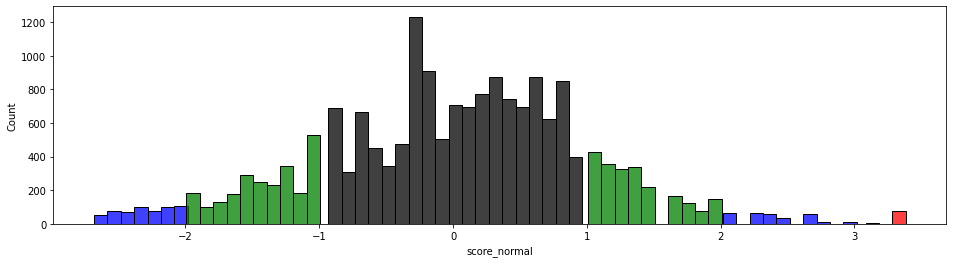

In [56]:
sns.histplot(df_pitch.loc[abs(df_pitch.score_normal - m_t) > 3*std_t].score_normal, color='red', binwidth=0.1)
sns.histplot(df_pitch.loc[(abs(df_pitch.score_normal - m_t) <= 3*std_t) & ((abs(df_pitch.score_normal - m_t) > 2*std_t)) ].score_normal, color='blue', binwidth=0.1)
sns.histplot(df_pitch.loc[(abs(df_pitch.score_normal - m_t) < 2*std_t) & ((abs(df_pitch.score_normal - m_t) > std_t))].score_normal, color='green', binwidth=0.1)
sns.histplot(df_pitch.loc[(abs(df_pitch.score_normal - m_t) < std_t)].score_normal, color='black', binwidth=0.1)

### Tratar los outliers
Una vez detectados los valores anómalos tenemos que tratarlos, podemos:
* Eliminar los registros con el valor anómalo (consideramos que estos registros no pueden aportar ninguna información)
* Sustituir su valor por la media con outliers (consideramos que los outliers son coincidencia de varios factores que no se va a volver a repetir pero su efecto debería seguir teniéndose en cuenta, por ejemplo, vendemos todos los helados un día de calor a una sola persona; sabemos que en general la venta no será a una sola persona pero contamos con seguir vendiendo todos los helados)
* Sustituir su valor por la media sin outliers (el outlier es un valor erróneo o un suceso que no se espera que vuelva a repetirse ni de forma aislada ni repartida)



In [57]:
df_pitch['outlier'] = 0
df_pitch.loc[(abs(df_pitch.score_normal - m_t) >= 2*std_t), 'outlier'] = 1

df_pitch_copia = df_pitch.copy(deep=True)

In [58]:
df_pitch.outlier.value_counts()

0    17412
1      977
Name: outlier, dtype: int64

### Ejercicio 8. Tratamiento de los outliers

Escribe código para realizar las siguientes operaciones con los outliers:

* Eliminarlos
* Imputar media con outliers
* Imputar media sin outliers

<AxesSubplot:xlabel='score_normal', ylabel='Count'>

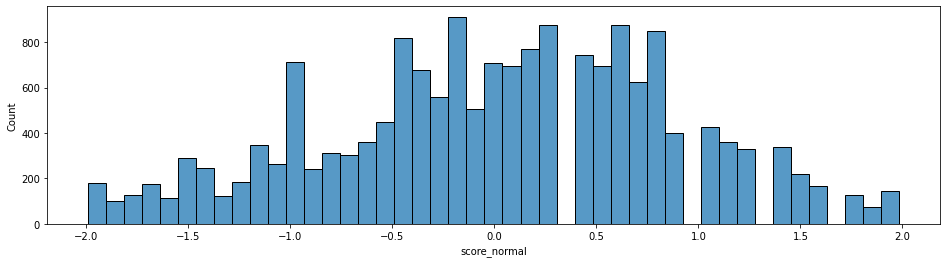

In [59]:
df_pitch_copia = df_pitch_copia[df_pitch_copia['outlier']!=1]
df_pitch_copia.outlier.value_counts()
sns.histplot(df_pitch_copia.score_normal)

<AxesSubplot:xlabel='score_normal', ylabel='Count'>

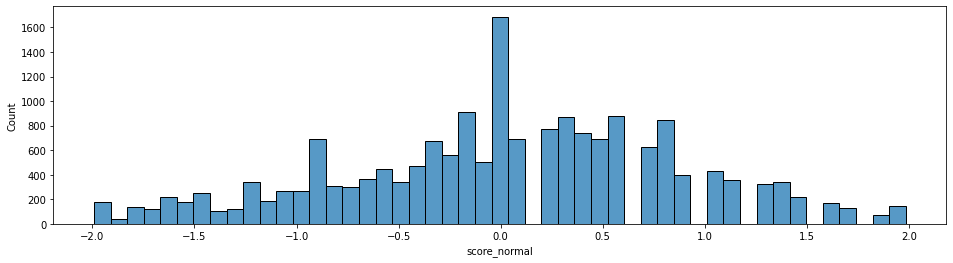

In [60]:
df_pitch_copia = df_pitch.copy(deep=True)
media_out = df_pitch_copia['score_normal'].mean()
df_pitch_copia['score_normal'] = np.where(df_pitch_copia['outlier']==1,media_out,df_pitch_copia['score_normal'])
sns.histplot(df_pitch_copia.score_normal)

<AxesSubplot:xlabel='score_normal', ylabel='Count'>

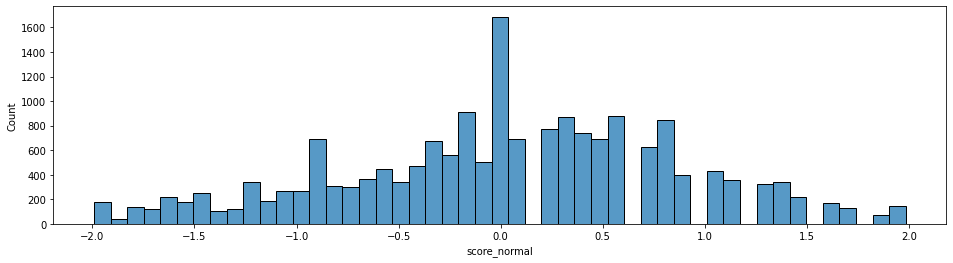

In [61]:
df_pitch_copy = df_pitch_copia.copy(deep=True)
media_out = df_pitch_copia[df_pitch_copia['outlier']==0].score_normal.mean()
df_pitch_copy['score_normal'] = np.where(df_pitch_copy['outlier']==1,media_out,df_pitch_copy['score_normal'])
sns.histplot(df_pitch_copy.score_normal)

## Ejercicio 9
Detecta los outliers en las muestras de las listas de precios utilizadas con la ley de Benford

In [62]:
from sklearn.preprocessing import PowerTransformer
df_precios = pd.read_excel('./data/precios_venta.xlsx')
df_precios.head()

def outlier_deteccion(df,muestra):
    p = PowerTransformer(method='yeo-johnson', standardize=True)
    df = df[df['MUESTRA'].str.contains(str(muestra))]
    media,std = df['PRECIO'].mean(),df['PRECIO'].std()
    print(f"""
    Menos de una desviación típica (ref 68%): {df.loc[abs(df.PRECIO - media) <= std].PRECIO.count() *100 / df.PRECIO.count()} %
    Menos de dos desviaciones (ref 95,4%): {df.loc[(abs(df.PRECIO - media) <= 2*std)].PRECIO.count()*100 / df.PRECIO.count()} %
    Menos de tres desviaciones (ref 99,7 %): {df.loc[(abs(df.PRECIO - media) <= 3*std)].PRECIO.count()*100 / df.PRECIO.count()} %
    """)
    
    if ((df.loc[abs(df.PRECIO - media) <= std].PRECIO.count() *100 / df.PRECIO.count())-68)<=abs(2) and ((df.loc[abs(df.PRECIO - media) <= 2*std].PRECIO.count() *100 / df.PRECIO.count())-95.4)<=abs(2) and ((df.loc[abs(df.PRECIO - media) <= 3*std].PRECIO.count() *100 / df.PRECIO.count())-99.7)<=abs(2):
        print('Sin Normalizar: DISTRIBUCION NORMAL')
    else:
        print('Sin Normalizar: NO ES DISTRIBUCION NORMAL')
    transformada = p.fit_transform(df[['PRECIO']])
    df['PRECIO_t'] = transformada
    m_t,std_t = df['PRECIO_t'].mean(),df['PRECIO_t'].std()

    print(f"""
    Menos de una desviación típica (ref 68%): {df.loc[abs(df.PRECIO_t - m_t) <= std_t].PRECIO_t.count() *100 / df.PRECIO_t.count()} %
    Menos de dos desviaciones (ref 95,4%): {df.loc[(abs(df.PRECIO_t - m_t) <= 2*std_t)].PRECIO_t.count()*100 / df.PRECIO_t.count()} %
    Menos de tres desviaciones (ref 99,7 %): {df.loc[(abs(df.PRECIO_t - m_t) <= 3*std_t)].PRECIO_t.count()*100 / df.PRECIO_t.count()} %
    """)
    
    if ((df.loc[abs(df.PRECIO_t - m_t) <= std_t].PRECIO_t.count() *100 / df.PRECIO_t.count())-68)<=abs(2) and ((df.loc[abs(df.PRECIO_t - m_t) <= 2*std_t].PRECIO_t.count() *100 / df.PRECIO_t.count())-95.4)<=abs(2) and ((df.loc[abs(df.PRECIO_t - m_t) <= 3*std_t].PRECIO_t.count() *100 / df.PRECIO_t.count())-99.7)<=abs(2):
        print('Normalizada: DISTRIBUCION NORMAL')
    else:
        print('Normalizada: NO ES DISTRIBUCION NORMAL')
    df['outlier'] = np.where(((df['PRECIO_t']<m_t-2*std_t) | (df['PRECIO_t']>m_t+2*std_t)),True,False)
    #print((m_t-2*std_t,m_t+2*std_t))
    print(df.outlier.value_counts())
    return df
    
for i in range(1,1+len(list(df_precios.MUESTRA.unique()))):
    print('Muestra Nº ',i)
    outlier_deteccion(df_precios,i)
    print('\n')

Muestra Nº  1

    Menos de una desviación típica (ref 68%): 99.28662420382166 %
    Menos de dos desviaciones (ref 95,4%): 99.7452229299363 %
    Menos de tres desviaciones (ref 99,7 %): 99.84713375796179 %
    
Sin Normalizar: NO ES DISTRIBUCION NORMAL

    Menos de una desviación típica (ref 68%): 65.8343949044586 %
    Menos de dos desviaciones (ref 95,4%): 96.5859872611465 %
    Menos de tres desviaciones (ref 99,7 %): 99.89808917197452 %
    
Normalizada: DISTRIBUCION NORMAL
False    3791
True      134
Name: outlier, dtype: int64


Muestra Nº  2

    Menos de una desviación típica (ref 68%): 87.97 %
    Menos de dos desviaciones (ref 95,4%): 92.83 %
    Menos de tres desviaciones (ref 99,7 %): 98.62 %
    
Sin Normalizar: NO ES DISTRIBUCION NORMAL

    Menos de una desviación típica (ref 68%): 68.29 %
    Menos de dos desviaciones (ref 95,4%): 97.27 %
    Menos de tres desviaciones (ref 99,7 %): 100.0 %
    
Normalizada: DISTRIBUCION NORMAL
False    9727
True      273
Name: outli

C:\Users\aleex\AppData\Local\Temp/ipykernel_13464/3010841480.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRECIO_t'] = transformada
C:\Users\aleex\AppData\Local\Temp/ipykernel_13464/3010841480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = np.where(((df['PRECIO_t']<m_t-2*std_t) | (df['PRECIO_t']>m_t+2*std_t)),True,False)
C:\Users\aleex\AppData\Local\Temp/ipykernel_13464/3010841480.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

### Detección Multidimensional de Outliers

**Isolation Forests**

In [63]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./data/HousingDataset.csv')
df = df.drop(columns=['ocean_proximity', 'longitude', 'latitude'])
df = df.fillna(0)

y = df['median_house_value']
X = df.drop(columns=['median_house_value'])

lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X,y))

0.5647714028827973


In [64]:
filtro = IsolationForest().fit_predict(df)
print(pd.Series(filtro).value_counts())
# Eliminamos los outliers

df['Filtro'] = pd.Series(filtro)
df = df[df['Filtro']==1]
df.drop(columns=['Filtro'],inplace=True)
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X,y))

 1    17360
-1     3280
dtype: int64
0.5641170498831499


**LocalOutlierFactor**

In [65]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv('./data/HousingDataset.csv')
df = df.drop(columns=['ocean_proximity', 'longitude', 'latitude'])
df = df.fillna(0)
filtro= LocalOutlierFactor().fit_predict(df)

df['Filtro'] = pd.Series(filtro)
print(df.Filtro.value_counts())
df = df[df['Filtro']==1]

lr = LinearRegression()

y = df['median_house_value']
X = df.drop(columns=['median_house_value','Filtro'])

lr.fit(X, y)
lr.score(X,y)

 1    20050
-1      590
Name: Filtro, dtype: int64


0.5842242190183924